# Ejercicio de regresión logística

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])
data.head()

,exam_1,exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


<Axes: xlabel='exam_1', ylabel='exam_2'>

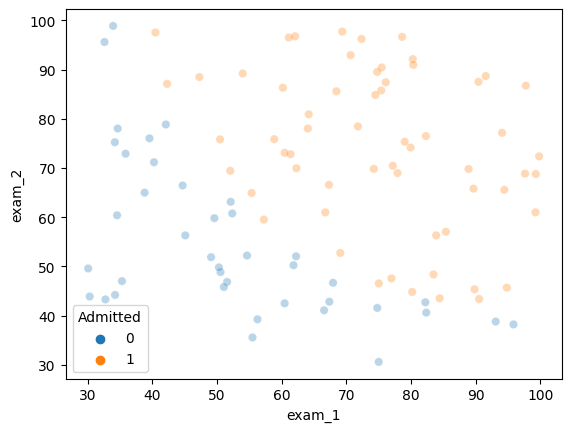

In [ ]:
sns.scatterplot(x='exam_1', y='exam_2', hue='Admitted', alpha =0.3, data=data)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

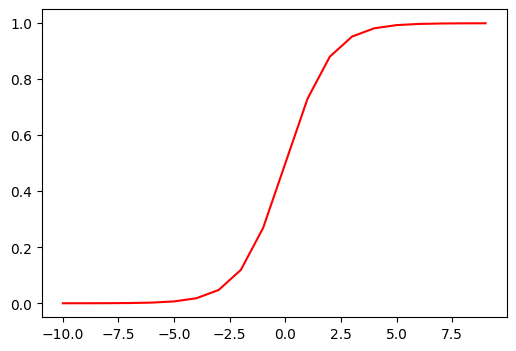

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
X = data[['exam_1', 'exam_2']]
y = data[['Admitted']]
logmodel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Persona con buenas notas
X_new = pd.DataFrame({'exam_1': [80],
                      'exam_2': [80]})
preds = logmodel.predict_proba(X_new)
preds[:,1]

array([0.99940295])

In [ ]:
preds

array([[5.97054964e-04, 9.99402945e-01]])

In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
#
X_new_2 = pd.DataFrame({'exam_1': [60],
                      'exam_2': [60]})
preds_2 = logmodel.predict_proba(X_new_2)
preds_2[:,1]

array([0.3327285])

In [ ]:
# Nueva columna
data['type'] = 'train'

#
obs_1 = pd.DataFrame({'exam_1': [80], 'exam_2': [80], 'Admitted': preds[:,1], 'type': "test"})
obs_2 = pd.DataFrame({'exam_1': [60], 'exam_2': [60], 'Admitted': preds_2[:,1], 'type': "test"})

#
print(obs_1)
print(obs_2)

   exam_1  exam_2  Admitted  type
0      80      80  0.999403  test
   exam_1  exam_2  Admitted  type
0      60      60  0.332728  test


In [ ]:
data_total = pd.concat([data,obs_1, obs_2])

<Axes: xlabel='exam_1', ylabel='exam_2'>

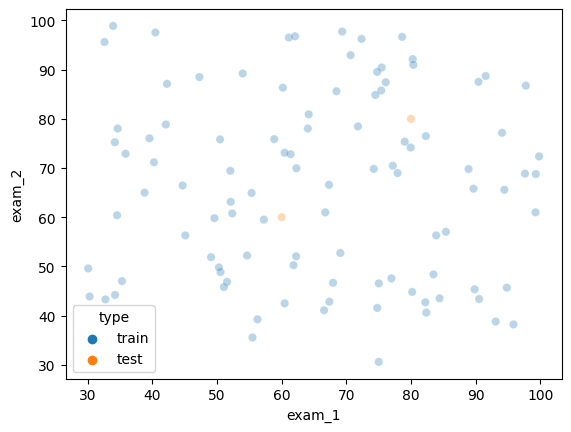

In [ ]:
# first, plot the observed data
sns.scatterplot(x='exam_1', y='exam_2', hue='type', alpha =0.3, data=data_total)

In [ ]:
data_total

,exam_1,exam_2,Admitted,type
0,34.623660,78.024693,0.000000,train
1,30.286711,43.894998,0.000000,train
2,35.847409,72.902198,0.000000,train
3,60.182599,86.308552,1.000000,train
4,79.032736,75.344376,1.000000,train
...,...,...,...,...
97,99.315009,68.775409,1.000000,train
98,55.340018,64.931938,1.000000,train
99,74.775893,89.529813,1.000000,train
0,80.000000,80.000000,0.999403,test


In [ ]:
print(logmodel.intercept_)
print(logmodel.coef_)

[-25.05219314]
[[0.20535491 0.2005838 ]]


In [ ]:
b_0 = logmodel.intercept_
b_1 = logmodel.coef_[0][0]
b_2 = logmodel.coef_[0][1]
print(b_0, b_1, b_2)

[-25.05219314] 0.20535491218577978 0.2005838039553014


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Estudiante 1
print(1/(1+np.exp(-(b_0 + b_1 *80 + b_2*80))))
# Estudiante 2
print(1/(1+np.exp(-(b_0 + b_1 *60 + b_2*60))))

[0.99940295]
[0.3327285]


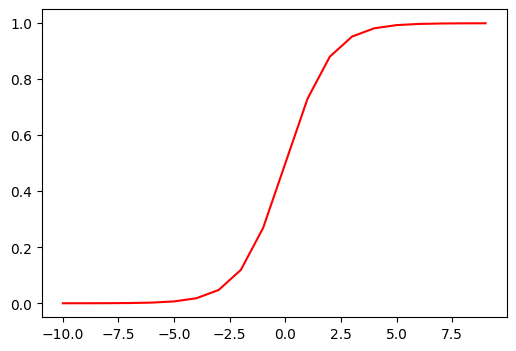

In [ ]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

## Visión Estadística

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

In [ ]:
fit = smf.glm('Admitted ~ exam_1 + exam_2',
              data=data,
              family=sm.families.Binomial(link=sm.families.links.logit())).fit()
# No es necesario especificar logit en la anterior función

print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Admitted   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.350
Date:                Mon, 18 Dec 2023   Deviance:                       40.700
Time:                        19:50:50   Pearson chi2:                     44.0
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6090
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.1613      5.799     -4.339      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(



- Intercept, es el valor cuando las demás variables son 0

- Exam_i, valor en cuanto mejora la probabilidad de ser admitido por cada punto de examen

- https://quantifyinghealth.com/interpret-logistic-regression-coefficients/

# Ejercicio

- Crea una columna, Sum exam 1 y sum exam 2
- Ajusta un modelo logístico

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt', header=None, names=['exam_1', 'exam_2','Admitted'])
data['exam_total'] = data['exam_1'] + data['exam_2']
data.head()

,exam_1,exam_2,Admitted,exam_total
0,34.623660,78.024693,0,112.648352
1,30.286711,43.894998,0,74.181708
2,35.847409,72.902198,0,108.749607
3,60.182599,86.308552,1,146.491151
4,79.032736,75.344376,1,154.377112


In [ ]:
fit_2 = smf.glm('Admitted ~ exam_total',
              data=data,
              family=sm.families.Binomial(link=sm.families.links.logit())).fit()
# No es necesario especificar logit en la anterior función

print(fit_2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Admitted   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.369
Date:                Mon, 18 Dec 2023   Deviance:                       40.738
Time:                        19:50:50   Pearson chi2:                     43.4
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6088
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.2097      5.798     -4.348      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [ ]:
# Realiza predicciones para 100, 110, 120, 130... visualiza como cambia la probabilidad#
print(fit_2.predict(pd.DataFrame({'exam_total': [100]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [110]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [120]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [130]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [140]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [150]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [160]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [170]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [180]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [190]})))
print(fit_2.predict(pd.DataFrame({'exam_total': [200]})))

0    0.00832
dtype: float64
0    0.060779
dtype: float64
0    0.332943
dtype: float64
0    0.793802
dtype: float64
0    0.967419
dtype: float64
0    0.995652
dtype: float64
0    0.999434
dtype: float64
0    0.999927
dtype: float64
0    0.99999
dtype: float64
0    0.999999
dtype: float64
0    1.0
dtype: float64


In [ ]:
# Comprueba que siempre se predice un valor entre 0 y 1.
## Realiza predicciones para -200 y 5000

In [ ]:
print(fit_2.predict(pd.DataFrame({'exam_total': [-200]})))

0    2.028445e-29
dtype: float64


In [ ]:
print(fit_2.predict(pd.DataFrame({'exam_total': [5000]})))

0    1.0
dtype: float64
